# Classer des images de vêtement avec Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## importer des donnees

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Exploration des données

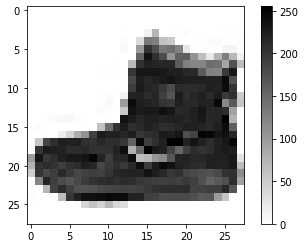

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
len(test_labels)

10000

## Pretraiter les données

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0


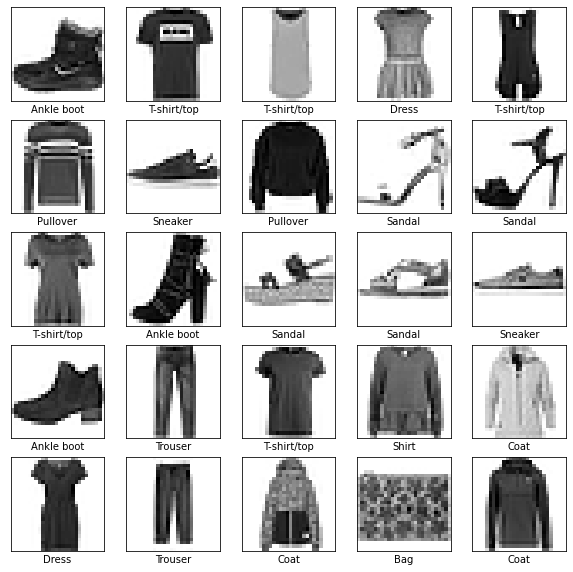

In [10]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, 1+i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Modele

In [11]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape = (28,28), name = 'layer1'),
        layers.Dense(128, activation = 'relu', name = 'layer2'),
        layers.Dropout(0.05, name ='layer3'),
        layers.Dense(10, name='layer4')

    ]
)

model.compile(optimizer ='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits =True),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5007 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3427 - accuracy: 0.8748
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3203 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.8877
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2900 - accuracy: 0.8930
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2783 - accuracy: 0.8971
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9008
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9028
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.251

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(f' Test accuracy : {test_acc:.3f} \n Test loss {test_loss:.3f}')

313/313 - 1s - loss: 0.3489 - accuracy: 0.8796 - 562ms/epoch - 2ms/step
 Test accuracy : 0.880 
 Test loss 0.349


## Faire des predictions

In [13]:
probability_model = keras.Sequential([
    model, layers.Softmax()
])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
predictions[0]

array([1.8434129e-08, 1.8840648e-11, 1.3776129e-10, 3.5766123e-09,
       8.8990726e-10, 4.3905326e-03, 2.7109518e-08, 1.4081992e-02,
       1.3602225e-08, 9.8152739e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color = color )
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  
  thisplot = plt.bar(range(10), predictions_array, color ="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')









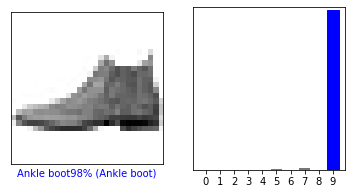

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

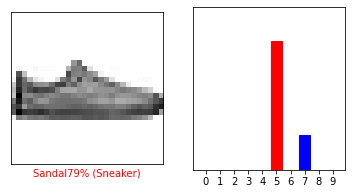

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

Traçons plusieurs images avec leurs prédictions. Notez que le modèle peut se tromper même lorsqu'il est très confiant

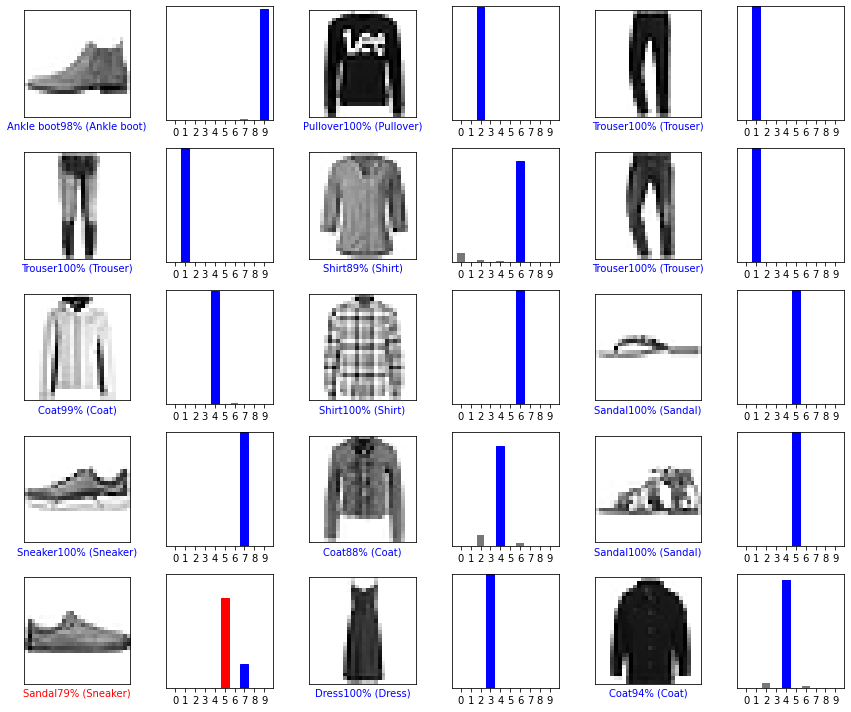

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[4.5151835e-05 1.5553026e-14 9.9682945e-01 1.3593060e-08 5.4530217e-04
  1.0004996e-12 2.5801251e-03 1.6947618e-19 1.0351340e-11 4.0515134e-14]]


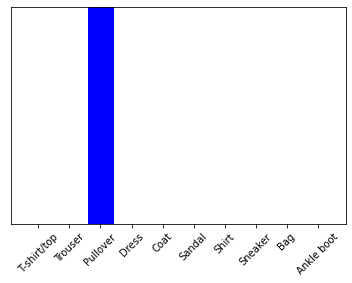

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [35]:
np.argmax(predictions_single[0])

2